In [14]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, accuracy_score


# convert csv train file to dataframe
path = '/content/drive/MyDrive/train.csv'

df = pd.read_csv(path)
df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23560,28,technician,single,tertiary,no,230,yes,no,cellular,20,apr,505,3,-1,0,unknown,0
31034,54,management,married,tertiary,no,752,no,no,telephone,29,jul,211,5,491,4,other,1
15161,53,services,married,secondary,no,139,yes,no,cellular,19,aug,28,17,-1,0,unknown,0
9786,56,management,married,tertiary,no,586,no,no,telephone,10,jul,123,1,-1,0,unknown,0
18019,44,technician,single,secondary,no,1195,yes,no,cellular,19,nov,187,6,188,9,failure,0


In [15]:
# delete unwanted featues that has effect on predicting y
# df.drop(columns=['contact', 'day', 'month'], inplace=True)
df.drop(columns=['day', 'month'], inplace=True)
df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
8834,44,blue-collar,married,secondary,no,701,no,yes,unknown,269,2,-1,0,unknown,0
18013,42,blue-collar,married,primary,no,807,yes,no,cellular,1057,1,-1,0,unknown,1
30665,30,admin.,single,secondary,no,265,yes,no,cellular,681,1,181,2,success,1
8385,58,retired,married,primary,no,741,no,no,unknown,81,2,-1,0,unknown,0
14398,52,housemaid,married,unknown,no,544,no,no,cellular,254,2,-1,0,unknown,0


In [16]:
# convert csv test file to dataframe
path_test = '/content/drive/MyDrive/test.csv'

df_test = pd.read_csv(path_test)
df_test.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2498,45,technician,married,secondary,no,4466,yes,no,unknown,3,jun,110,1,-1,0,unknown,0
4133,29,blue-collar,single,secondary,no,8079,no,yes,cellular,10,jul,171,1,-1,0,unknown,0
9778,48,blue-collar,married,secondary,no,1143,yes,no,cellular,17,apr,264,1,317,1,failure,0
4337,26,blue-collar,married,secondary,no,155,no,yes,cellular,15,jul,76,3,-1,0,unknown,0
11887,25,management,single,tertiary,no,1317,no,no,cellular,26,may,176,1,-1,0,unknown,1


In [17]:
# delete unwanted featues that has effect on predicting y
df_test.drop(columns=['day', 'month'], inplace=True)
#df_test.drop(columns=['contact', 'day', 'month'], inplace=True)
df_test.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
3190,58,management,divorced,primary,no,5914,no,no,unknown,69,4,-1,0,unknown,0
5195,26,services,single,secondary,no,1163,no,yes,cellular,239,4,-1,0,unknown,0
6733,47,blue-collar,married,secondary,no,4709,no,no,cellular,78,4,-1,0,unknown,0
11250,34,blue-collar,married,secondary,no,3778,yes,no,telephone,259,3,-1,0,unknown,0
4778,43,management,divorced,tertiary,no,3163,yes,no,cellular,211,3,-1,0,unknown,0


<ipython-input-18-19bfc909de90>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], norm_hist=False, kde=False);


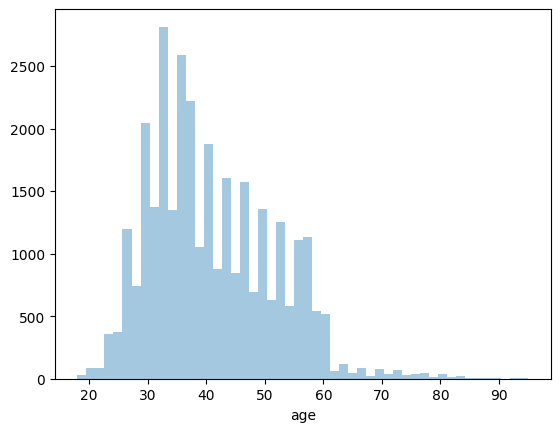

In [18]:
# distribution of age
sns.distplot(df['age'], norm_hist=False, kde=False);

#sns.histplot(df['age'],  kde=False);

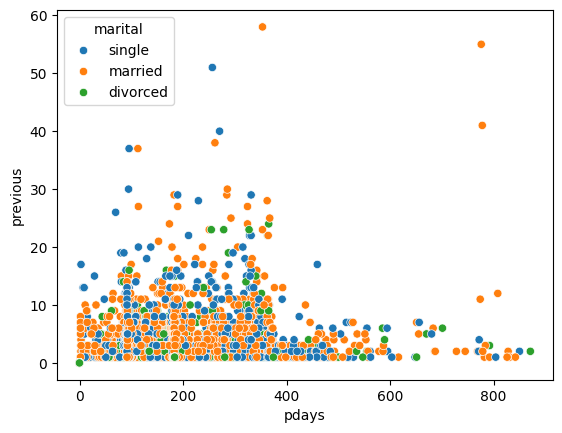

In [19]:
# scatter plot graph to show relationship between 'pdays' and 'previous' columns
sns.scatterplot(data=df, x='pdays', y='previous', hue='marital');

In [20]:
# value counts for job column
df['job'].value_counts()

blue-collar      6816
management       6642
technician       5273
admin.           3620
services         2937
retired          1607
self-employed    1103
entrepreneur     1013
unemployed        919
housemaid         864
student           650
unknown           204
Name: job, dtype: int64

In [21]:
# mean of various jobs
df_ = df.query("job != 'unknown' ") \
  .groupby('job')['age'] \
  .agg(['mean', 'count']).sort_values(by='mean', ascending=False)


df_.style.background_gradient(axis=0)

,mean,count
job,,
retired,61.553827,1607
housemaid,46.465278,864
entrepreneur,42.066140,1013
unemployed,40.830250,919
self-employed,40.517679,1103
management,40.506323,6642
blue-collar,40.074677,6816
technician,39.393514,5273
admin.,39.187017,3620


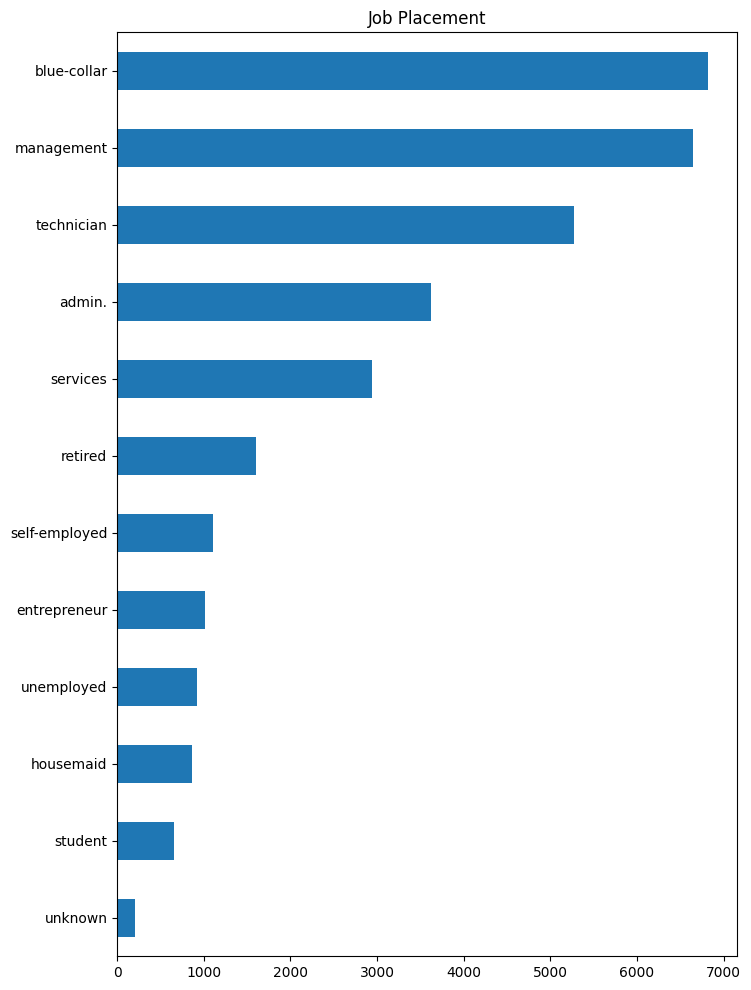

In [22]:
# Histogram of job placement
df['job'].value_counts() \
    .sort_values(ascending=True) \
    .plot(kind='barh', figsize=(8, 12
                               ),
         title='Job Placement')
plt.show()

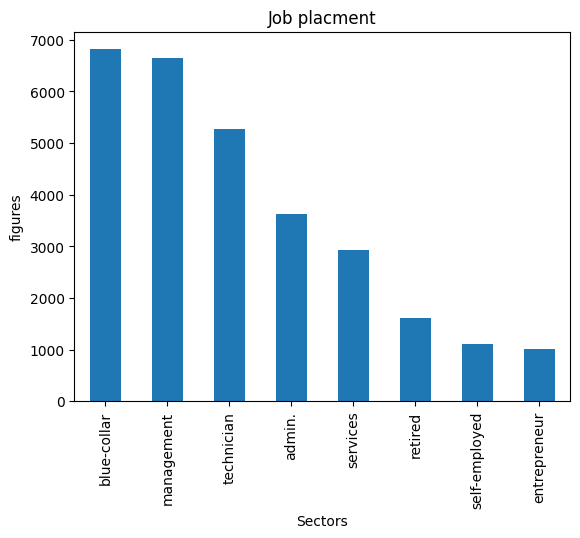

In [23]:
# histogram for job column
ax = df['job'].value_counts().head(8) \
          .plot(kind='bar', title= 'Job placment')

ax.set_xlabel('Sectors')
ax.set_ylabel('figures');

In [24]:
# job category
df.job.unique()

array(['technician', 'entrepreneur', 'blue-collar', 'unknown',
       'management', 'retired', 'admin.', 'services', 'self-employed',
       'housemaid', 'unemployed', 'student'], dtype=object)

In [25]:
# job vs y

y_0 = df.groupby(df['job'][df['y'] == 0]).size().reset_index(name='unsubscriber')
y_1 = df.groupby(df['job'][df['y'] == 1]).size().reset_index(name='subscriber')
total = df.groupby('job').size().reset_index(name='Total')

jobTable = y_0.join(y_1['subscriber']).join(total['Total'])
jobTable['job'] = ['technician', 'entrepreneur', 'blue-collar', 'unknown',
       'management', 'retired', 'admin.', 'services', 'self-employed',
       'housemaid', 'unemployed', 'student']

jobtab = jobTable.sort_values(by='subscriber', ascending=False)

jobtab.style.background_gradient(axis=0)

,job,unsubscriber,subscriber,Total
4,management,5723,919,6642
9,housemaid,4667,606,5273
1,entrepreneur,6319,497,6816
0,technician,3172,448,3620
5,retired,1241,366,1607
7,services,2685,252,2937
8,self-employed,462,188,650
10,unemployed,784,135,919
6,admin.,976,127,1103
2,blue-collar,922,91,1013


In [26]:
# job vs y

jobTable['unsubscriber'] = round((y_0['unsubscriber']/total['Total'])*100,2)
jobTable['subscriber'] = round((y_1['subscriber']/total['Total'])*100,2)

jobPct = jobTable.iloc[:,0:3]
jobPct = jobPct.rename(columns={'unsubscriber': 'unsubscriber(%)', 'subscriber': 'subscriber(%)'})

jobpercent = jobPct.sort_values(by='subscriber(%)', ascending=False)

jobpercent.style.background_gradient(axis=0)

,job,unsubscriber(%),subscriber(%)
8,self-employed,71.080000,28.920000
5,retired,77.220000,22.780000
10,unemployed,85.310000,14.690000
4,management,86.160000,13.840000
0,technician,87.620000,12.380000
6,admin.,88.490000,11.510000
9,housemaid,88.510000,11.490000
11,student,89.220000,10.780000
2,blue-collar,91.020000,8.980000
3,unknown,91.090000,8.910000


In [27]:
# education category
df.education.unique()

array(['secondary', 'unknown', 'tertiary', 'primary'], dtype=object)

<ipython-input-28-e7df1b417bf9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(['primary', 'secondary','tertiary','unknown'])


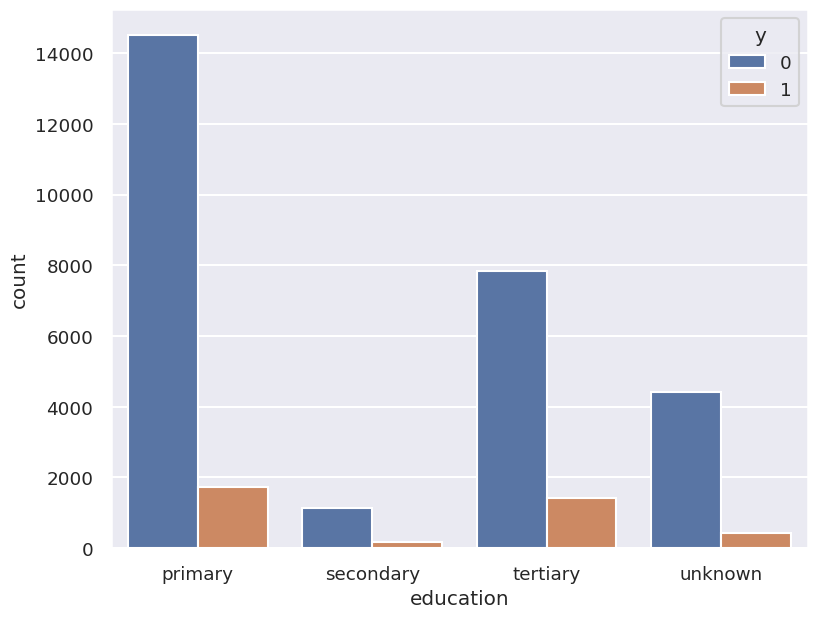

In [28]:
# education vs y
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='education', hue='y', data=df)
edu.set_xticklabels(['primary', 'secondary','tertiary','unknown'])
plt.show()

In [29]:
# education vs y

y_0 = df.groupby(df['education'][df['y'] == 0]).size().reset_index(name='unsubscriber')
y_1 = df.groupby(df['education'][df['y'] == 1]).size().reset_index(name='subscriber')
total = df.groupby('education').size().reset_index(name='Total')

eduTable = y_0.join(y_1['subscriber']).join(total['Total'])
eduTable['education'] = ['primary','secondary','tertiary','unknown']

edutab = eduTable.sort_values(by='subscriber', ascending=False)

edutab.style.background_gradient(axis=0)

,education,unsubscriber,subscriber,Total
1,secondary,14520,1722,16242
2,tertiary,7848,1414,9262
0,primary,4424,419,4843
3,unknown,1128,173,1301


In [30]:
#  education vs y

eduTable['unsubscriber'] = round((y_0['unsubscriber']/total['Total'])*100,2)
eduTable['subscriber'] = round((y_1['subscriber']/total['Total'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'unsubscriber': 'unsubscriber(%)', 'subscriber': 'subscriber(%)'})

edupercent = eduPct.sort_values(by='subscriber(%)', ascending=False)

edupercent.style.background_gradient(axis=0)

,education,unsubscriber(%),subscriber(%)
2,tertiary,84.730000,15.270000
3,unknown,86.700000,13.300000
1,secondary,89.400000,10.600000
0,primary,91.350000,8.650000


<ipython-input-31-3be156df92fe>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(['single','married','divorced'])


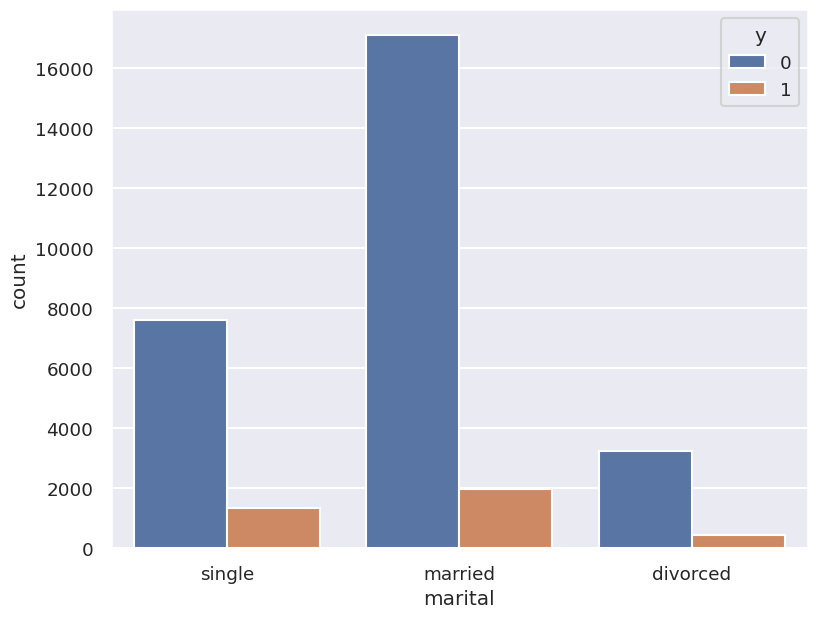

In [31]:
# marital status vs y

sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='marital', hue='y', data=df)
edu.set_xticklabels(['single','married','divorced'])
plt.show()

In [32]:
# marital status vs y

y0 = df.groupby(df['marital'][df['y'] == 0]).size().reset_index(name='Unsubscriber')
y1 = df.groupby(df['marital'][df['y'] == 1]).size().reset_index(name='Subscriber')
total = df.groupby('marital').size().reset_index(name='Total')

marriTable = y0.join(y1['Subscriber']).join(total['Total'])
marriTable['marital'] = ['married','single','divorced']

marritab = marriTable.sort_values(by='Subscriber', ascending=False)
marritab.style.background_gradient(axis=0)


,marital,Unsubscriber,Subscriber,Total
1,single,17100,1957,19057
2,divorced,7591,1344,8935
0,married,3229,427,3656


In [33]:
# mean of various jobs
df_ = df.query("job != 'unknown' ") \
  .groupby('job')['age'] \
  .agg(['mean', 'count']).sort_values(by='mean', ascending=False)


df_.style.background_gradient(axis=0)

,mean,count
job,,
retired,61.553827,1607
housemaid,46.465278,864
entrepreneur,42.066140,1013
unemployed,40.830250,919
self-employed,40.517679,1103
management,40.506323,6642
blue-collar,40.074677,6816
technician,39.393514,5273
admin.,39.187017,3620


In [34]:
# marital status vs y

marriTable['Unsubscriber'] = round((y0['Unsubscriber']/total['Total'])*100,2)
marriTable['Subscriber'] = round((y1['Subscriber']/total['Total'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'Unsubscriber': 'Unsubscriber(%)', 'Subscriber': 'Subscriber(%)'})

marriPct_ = marriPct.sort_values(by='Subscriber(%)', ascending=False)
marriPct_.style.background_gradient(axis=0)

,marital,Unsubscriber(%),Subscriber(%)
2,divorced,84.960000,15.040000
0,married,88.320000,11.680000
1,single,89.730000,10.270000


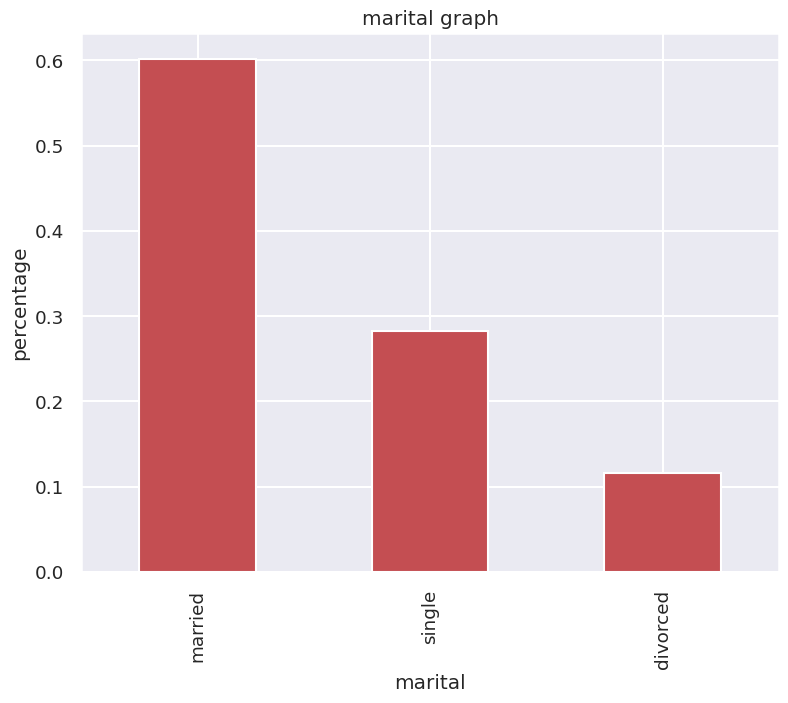

In [35]:
# Graph for marital column
ax = df['marital'].value_counts(normalize=True) \
        .plot(kind= 'bar', title='marital graph', color='r')

ax.set_xlabel('marital')
ax.set_ylabel('percentage');

In [36]:
# check for null values in the train data

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [37]:
# check for null values in the train data

df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
# shape of train and test data
print(df.shape)
print('\n')
print(df_test.shape)

(31648, 15)


(13563, 15)


In [39]:
# info on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31648 entries, 0 to 31647
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31648 non-null  int64 
 1   job        31648 non-null  object
 2   marital    31648 non-null  object
 3   education  31648 non-null  object
 4   default    31648 non-null  object
 5   balance    31648 non-null  int64 
 6   housing    31648 non-null  object
 7   loan       31648 non-null  object
 8   contact    31648 non-null  object
 9   duration   31648 non-null  int64 
 10  campaign   31648 non-null  int64 
 11  pdays      31648 non-null  int64 
 12  previous   31648 non-null  int64 
 13  poutcome   31648 non-null  object
 14  y          31648 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [40]:
# info on the data type
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13563 entries, 0 to 13562
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13563 non-null  int64 
 1   job        13563 non-null  object
 2   marital    13563 non-null  object
 3   education  13563 non-null  object
 4   default    13563 non-null  object
 5   balance    13563 non-null  int64 
 6   housing    13563 non-null  object
 7   loan       13563 non-null  object
 8   contact    13563 non-null  object
 9   duration   13563 non-null  int64 
 10  campaign   13563 non-null  int64 
 11  pdays      13563 non-null  int64 
 12  previous   13563 non-null  int64 
 13  poutcome   13563 non-null  object
 14  y          13563 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.6+ MB


In [41]:
# summary statistics for train data
df.describe()

,age,balance,duration,campaign,pdays,previous,y
count,31648.000000,31648.000000,31648.000000,31648.000000,31648.000000,31648.000000,31648.000000
mean,40.947769,1355.956174,258.342518,2.759795,40.110497,0.572580,0.117796
std,10.610788,2990.432159,258.558455,3.091928,100.208441,1.924108,0.322371
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,452.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1415.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,58.000000,1.000000


In [42]:
# summary data for test data
df_test.describe()

,age,balance,duration,campaign,pdays,previous,y
count,13563.000000,13563.000000,13563.000000,13563.000000,13563.000000,13563.000000,13563.000000
mean,40.909238,1377.009585,257.744378,2.773280,40.401607,0.598393,0.115093
std,10.637687,3167.990273,255.115700,3.112285,99.945933,3.007971,0.319145
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,71.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,439.000000,179.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1450.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,98417.000000,3422.000000,50.000000,854.000000,275.000000,1.000000


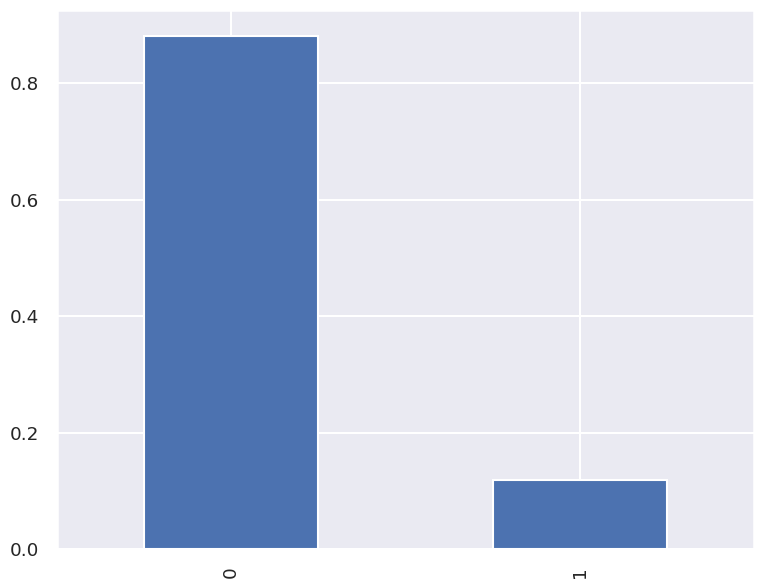

In [43]:
# plot showing the proportion of positive and negative class of y in the train data

df.y.value_counts(normalize=True).plot(kind='bar');

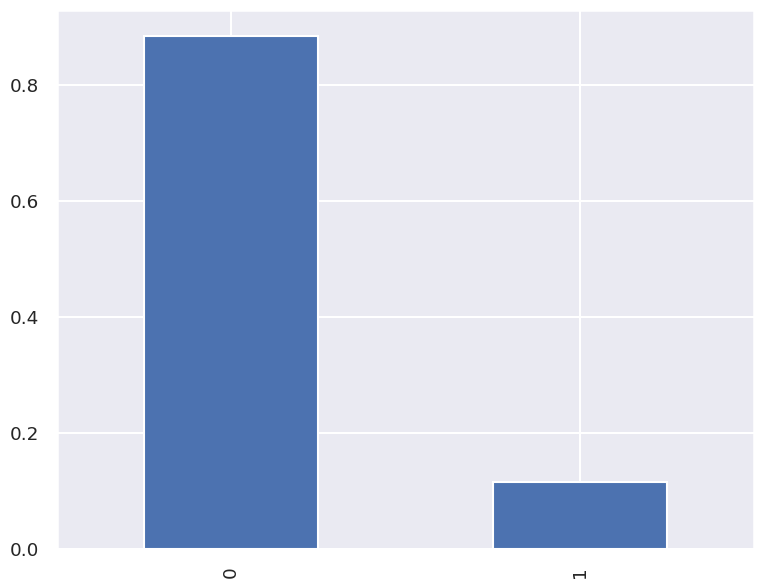

In [44]:
# plot showing the proportion of positive and negative class of y in the test data
df_test.y.value_counts(normalize=True).plot(kind='bar');

In [45]:
# number of 1 and 0
count_class_0, count_class_1 = df.y.value_counts()
print(count_class_0)
print('\n')
print(count_class_1)

27920


3728


In [46]:
# divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

Random over-sampling:
0    27920
1    27920
Name: y, dtype: int64


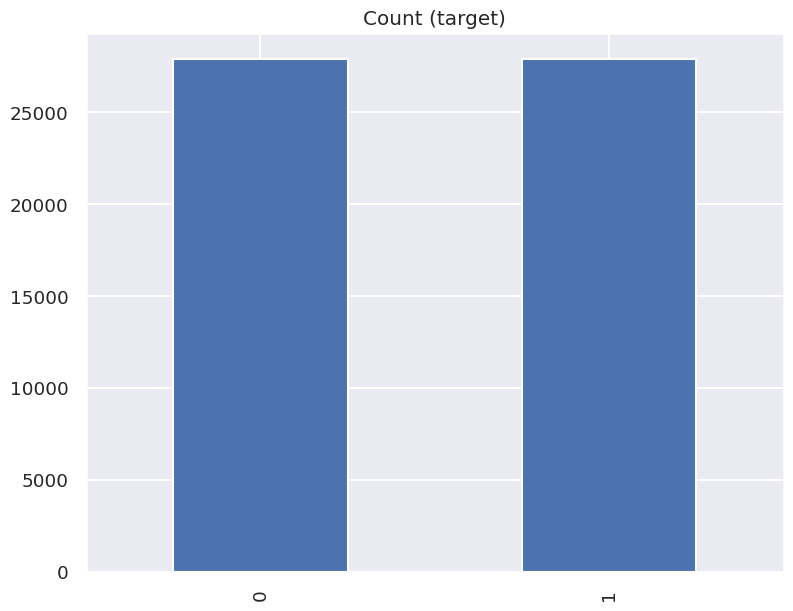

In [47]:
# oversampling of imbalanced train data

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.y.value_counts())
df_over.y.value_counts().plot(kind='bar', title='Count (target)');


In [48]:
# number of 0 and 1 in test data
#count_test_0, count_test_1 = df_test.y.value_counts()
#print(count_test_0)
#print('\n')
#print(count_test_1)

In [49]:
# divide by class
#df_test_0 = df_test[df_test['y'] == 0]
##df_test_1 = df_test[df_test['y'] == 1]

In [50]:
# oversampling of imbalanced test data

#df_test_1_over = df_test_1.sample(count_test_0, replace=True)
#df_test_over = pd.concat([df_test_0, df_test_1_over], axis=0)

#print('Random over-sampling:')
#print(df_test_over.y.value_counts())
##df_test_over.y.value_counts().plot(kind='bar', title='Count (target)');

<ipython-input-51-25c088bf20d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_over.corr(), cmap='BuPu', annot=True)


<Axes: >

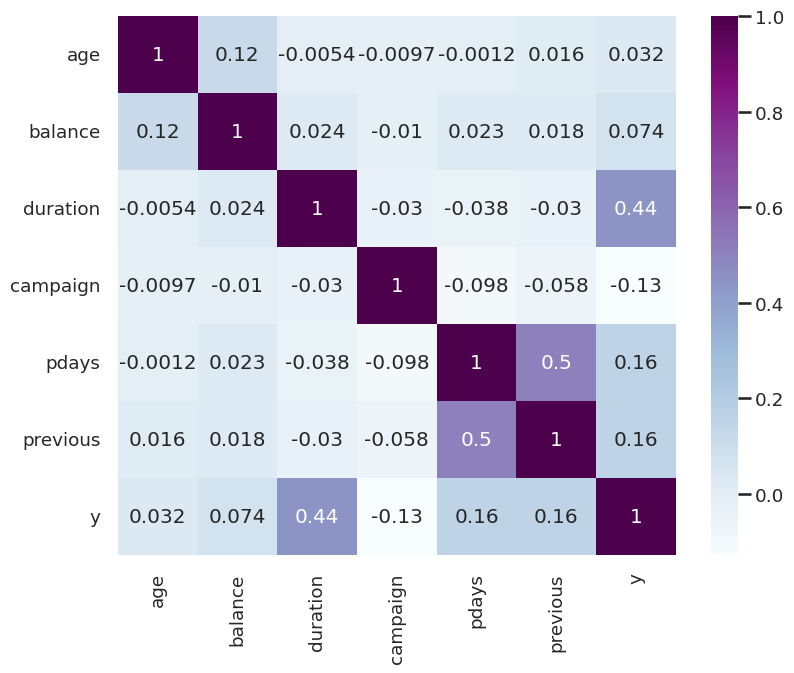

In [51]:
# heatmap showing correlation of train data
sns.heatmap(df_over.corr(), cmap='BuPu', annot=True)

In [52]:
# correlation of train data
df_over.corr()

<ipython-input-52-ccf206af37c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_over.corr()


,age,balance,duration,campaign,pdays,previous,y
age,1.000000,0.115344,-0.005366,-0.009708,-0.001232,0.015880,0.032233
balance,0.115344,1.000000,0.023993,-0.010322,0.022740,0.017969,0.073513
duration,-0.005366,0.023993,1.000000,-0.029798,-0.038302,-0.030038,0.441663
campaign,-0.009708,-0.010322,-0.029798,1.000000,-0.097662,-0.057697,-0.128084
pdays,-0.001232,0.022740,-0.038302,-0.097662,1.000000,0.504764,0.155052
previous,0.015880,0.017969,-0.030038,-0.057697,0.504764,1.000000,0.156677
y,0.032233,0.073513,0.441663,-0.128084,0.155052,0.156677,1.000000


In [53]:
# heatmap showing correlation of test data

#sns.heatmap(df_test_over.corr(), cmap='BuPu', annot=True)

In [54]:
# correlation of test data
#df_test_over.corr()

In [55]:
# identy numeric and categorical data

TARGET = 'y'
FEATURES = df_over.columns.drop(TARGET)

NUMERICAL = df_over[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")


Numerical features: age, balance, duration, campaign, pdays, previous
Categorical features: contact, default, education, housing, job, loan, marital, poutcome


In [56]:
# split data features and target

X_train = df_over.drop('y', axis=1)
y_train = df_over['y']
X_test = df_test.drop('y', axis=1)
y_test = df_test['y']

reg = 0.01


# Define preprocessing for numeric columns (normalize them so they're on the same scale)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICAL),
        ('cat', categorical_transformer, CATEGORICAL)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
       'poutcome'],
      dtype='object'))])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


In [57]:
X_train.shape

(55840, 14)

In [58]:
# deduce the accuracy score

predictions = model.predict(X_test)
#print('Predicted labels: ', predictions)
#print('Actual labels:    ' ,y_test)

roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC score:", roc_auc)



print('Accuracy: ', accuracy_score(y_test, predictions))


ROC AUC score: 0.8213955585664187
Accuracy:  0.8308633783086338


In [59]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.3875421908560908
Overall Recall: 0.809096732863549


In [60]:
from sklearn. metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     12002
           1       0.39      0.81      0.52      1561

    accuracy                           0.83     13563
   macro avg       0.68      0.82      0.71     13563
weighted avg       0.90      0.83      0.85     13563



In [61]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[10006  1996]
 [  298  1263]]
